In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read CSV file into a pandas DataFrame
file_path = 'OnlineRetail (1).csv'
df = pd.read_csv(file_path)

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-1-2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12-1-2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-1-2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-1-2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-1-2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-9-2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-9-2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-9-2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-9-2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011,12


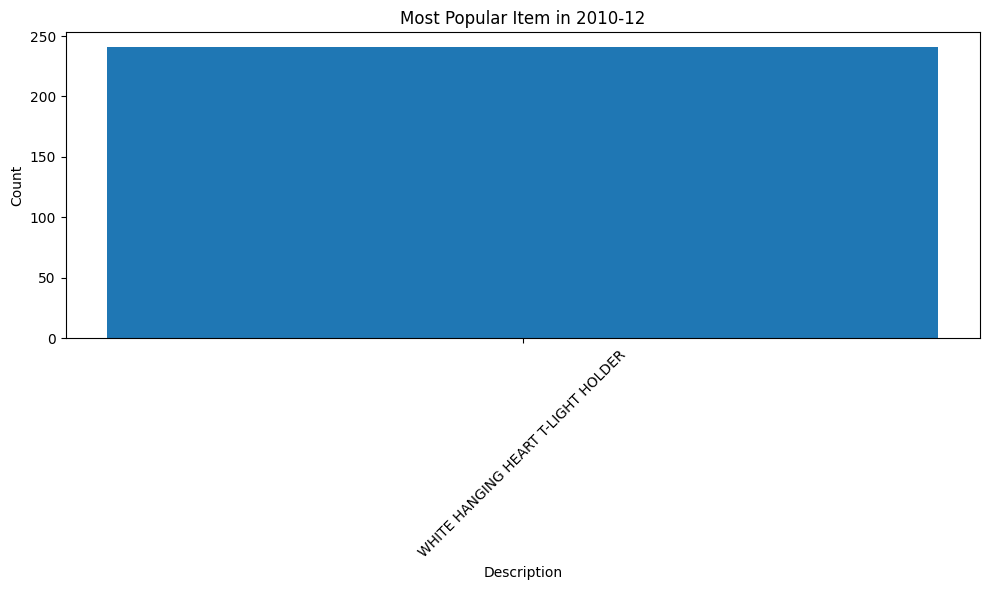

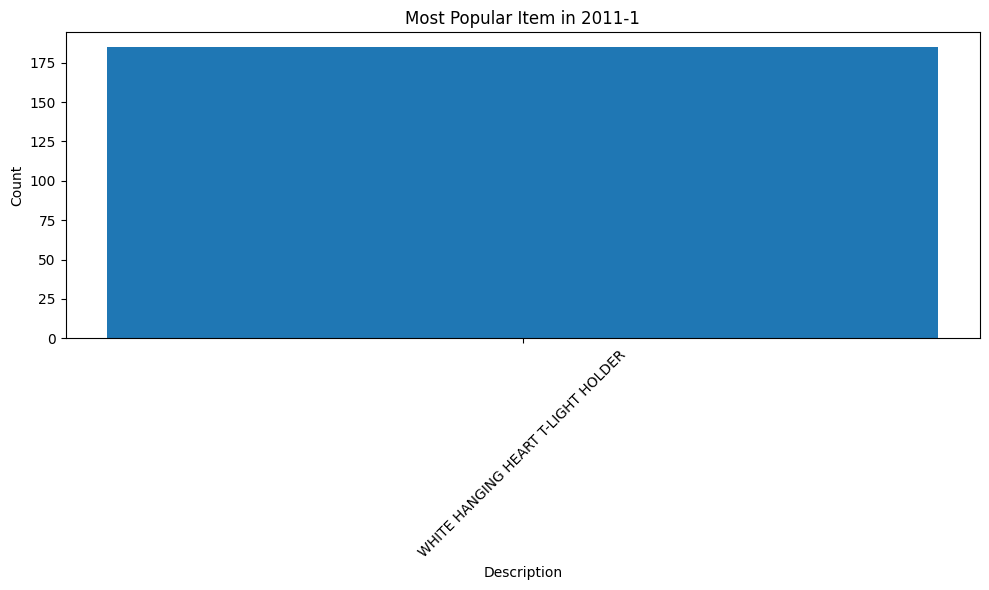

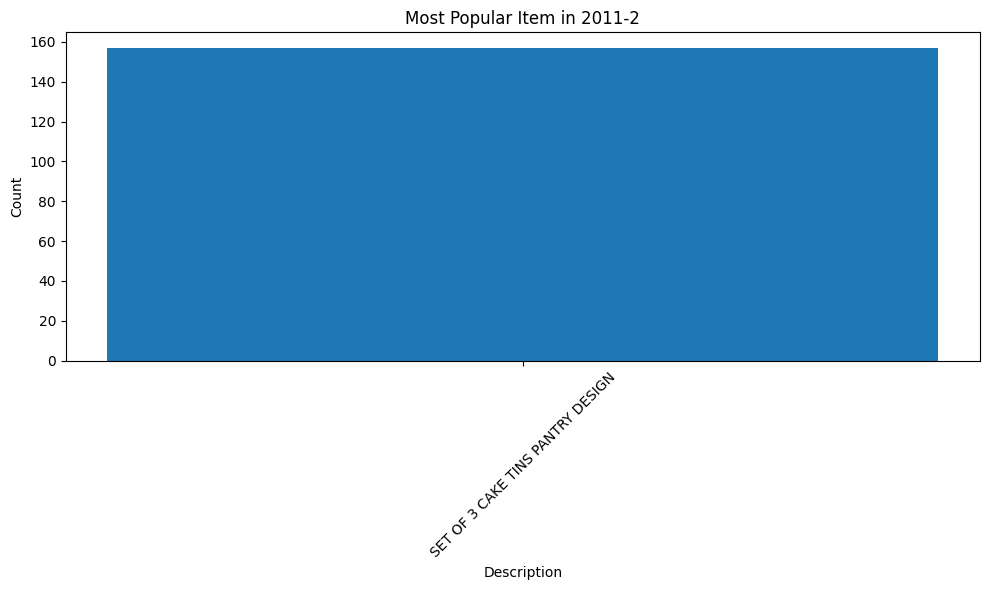

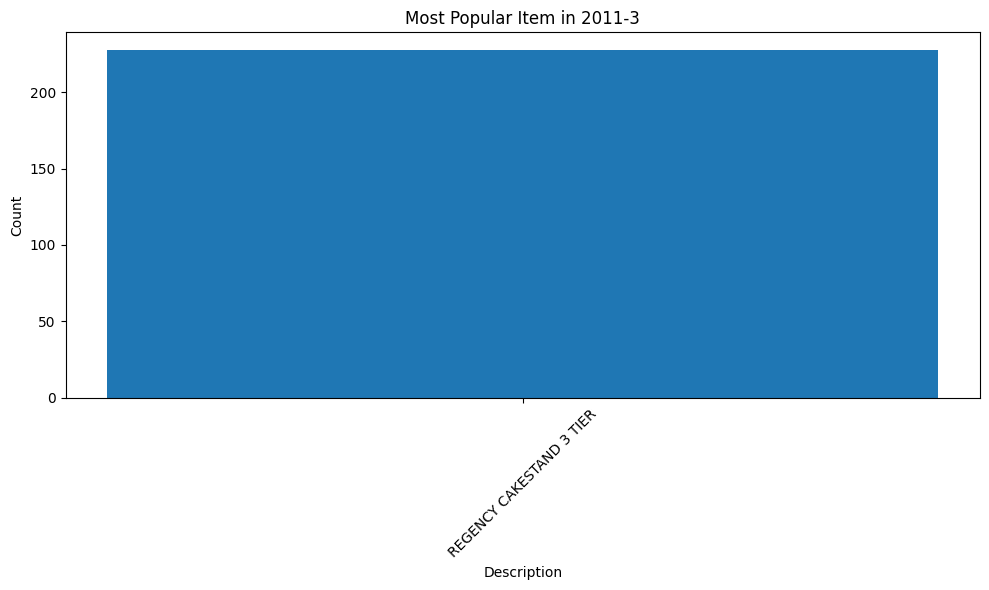

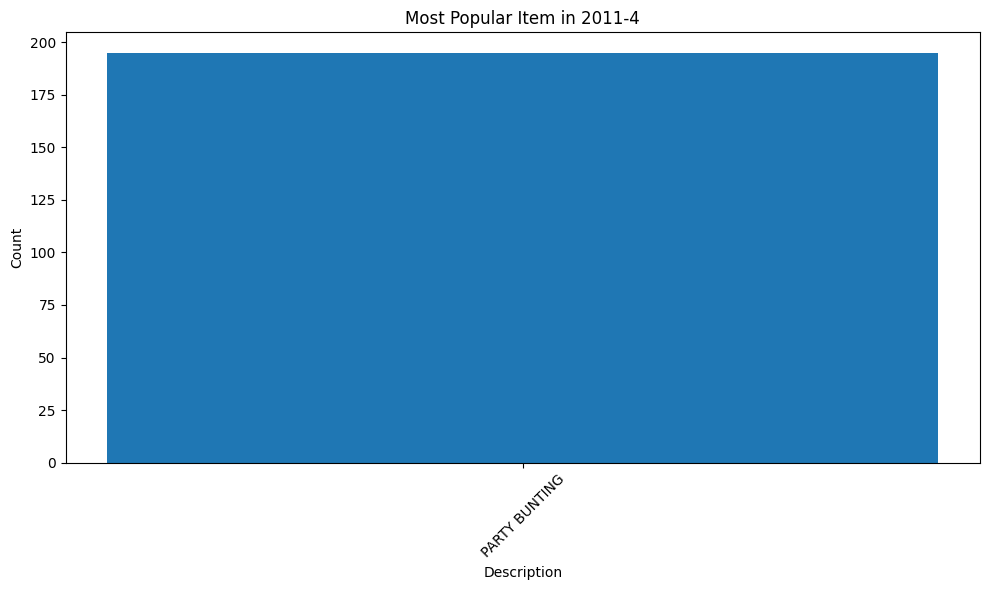

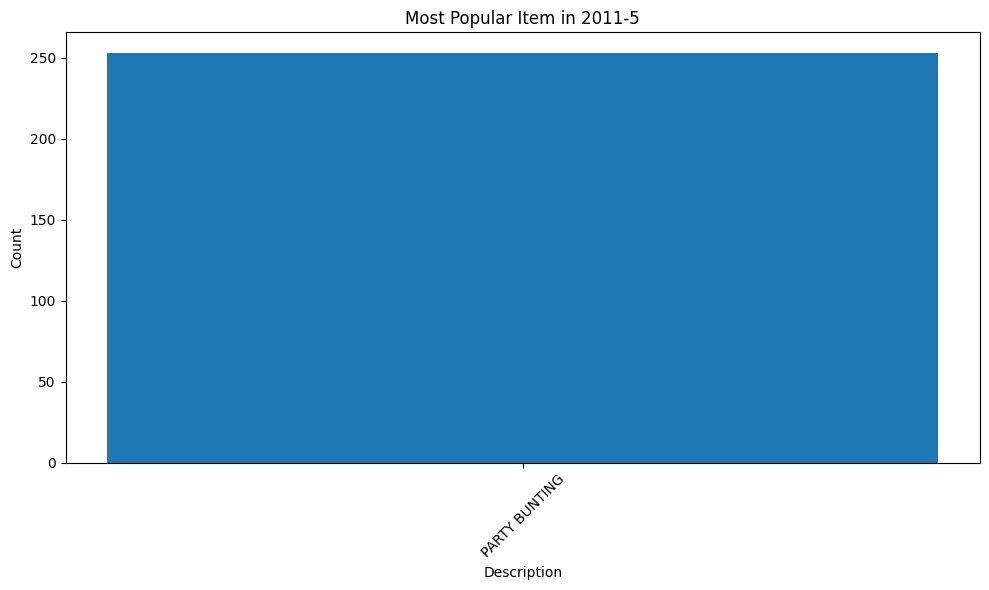

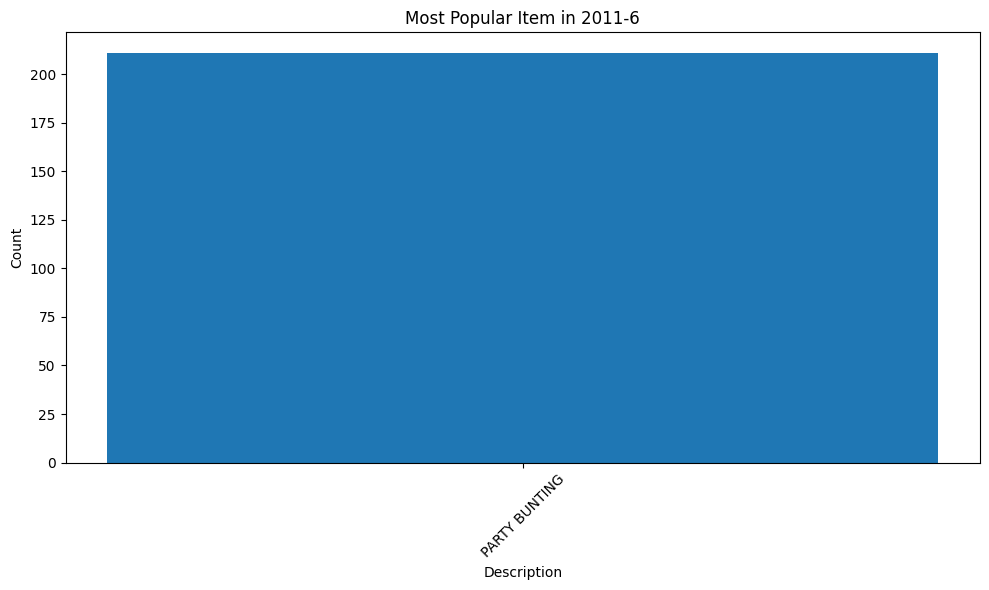

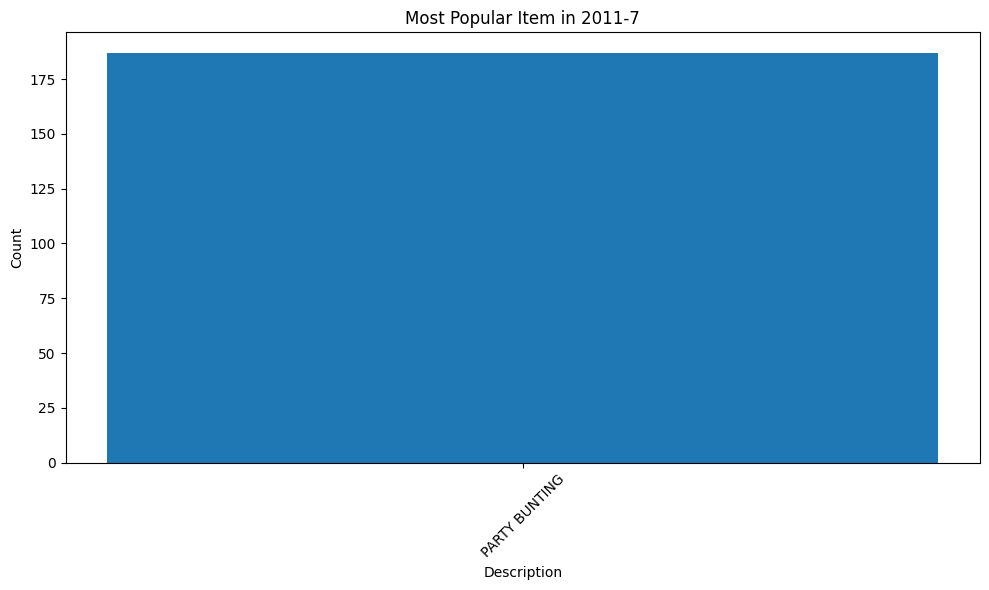

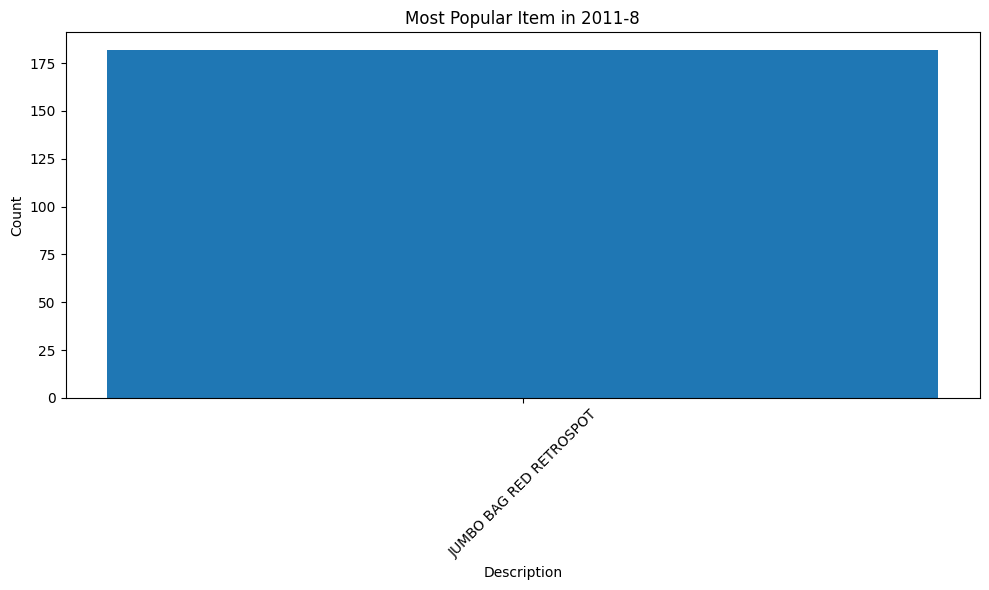

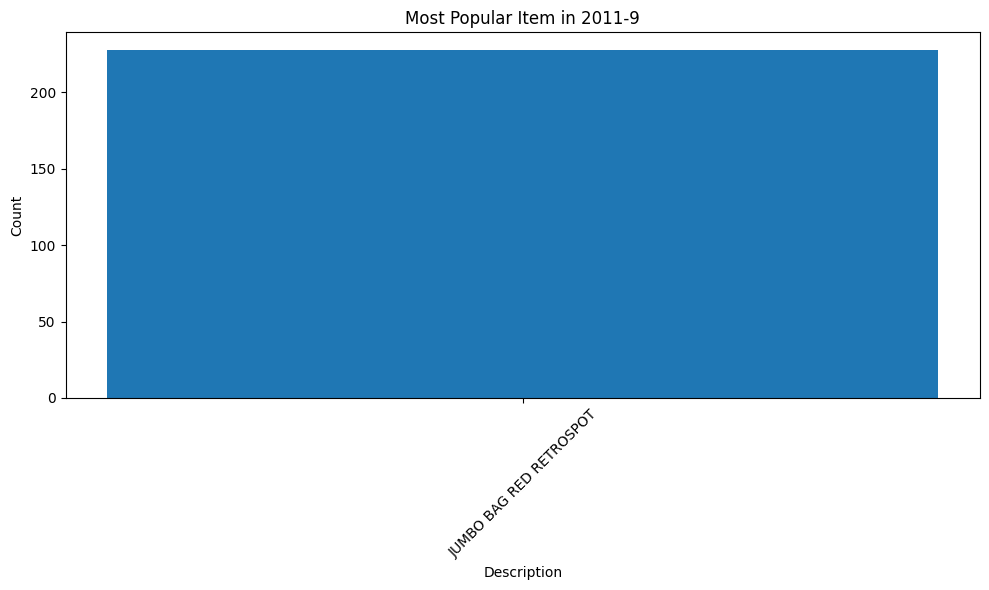

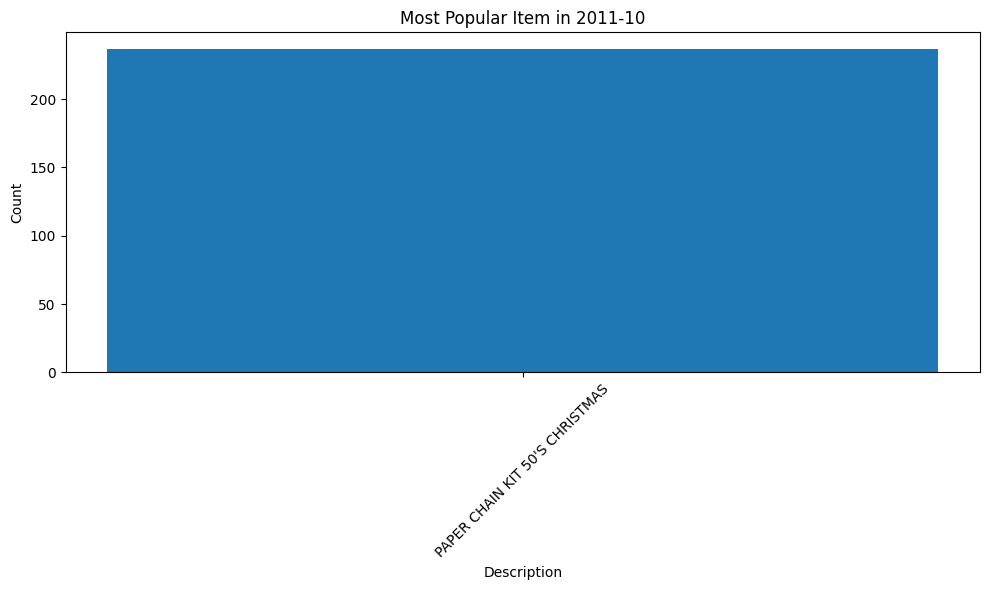

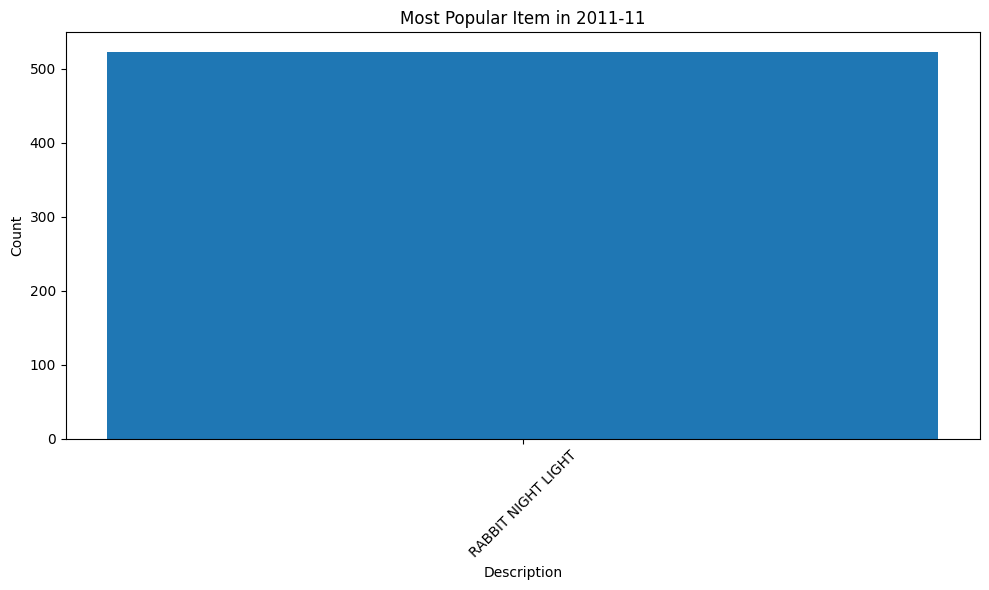

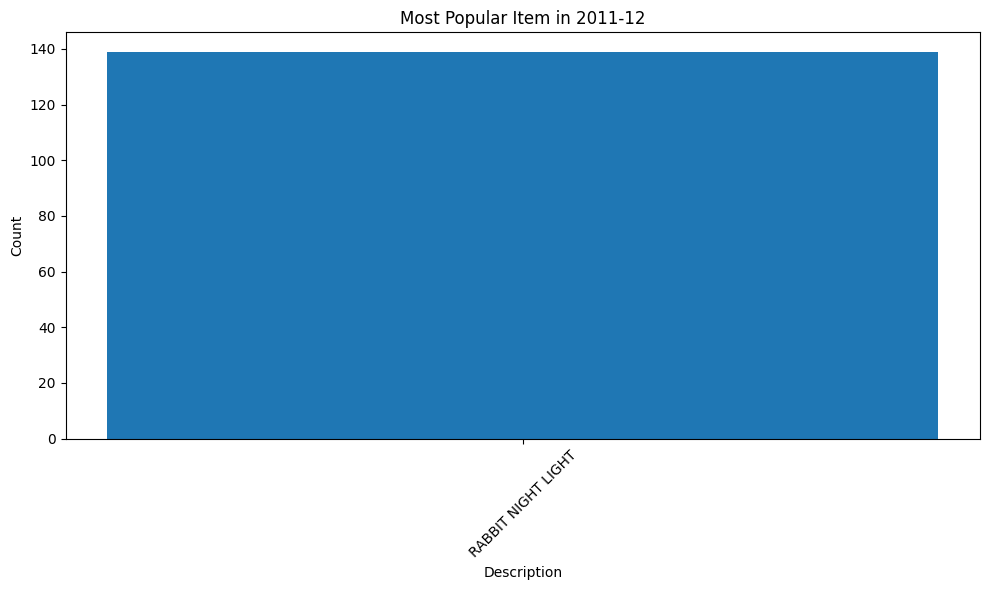

In [5]:
# Group data by year, month, and item to get counts
grouped_data = df.groupby(['Year', 'Month', 'Description']).size().reset_index(name='Count')

# Get the most popular item for each month
popular_items = grouped_data.groupby(['Year', 'Month']).apply(lambda x: x[x['Count'] == x['Count'].max()])

# Plotting
for index, row in popular_items.iterrows():
    plt.figure(figsize=(10, 6))
    plt.bar(row['Description'], row['Count'])
    plt.title(f"Most Popular Item in {row['Year']}-{row['Month']}")
    plt.xlabel("Description")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
